In [108]:
import numpy as np
from optimize.util import optimize
import regression as reg

model = (<function lin_test at 0x000001978CACC3A0>, <function lin_jac at 0x000001978CACC430>)
start =  [10000.  1000.]
function =  <function <lambda> at 0x00000197911DD790>
Filename: C:\Workspace\study\sem-4\metopts-labs\lab_3\solution\optimize\linear\sgd.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    10    150.5 MiB    150.5 MiB           1   @profile
    11                                         def sgd(x, y, start,
    12                                                 eps=1e-4, learning_rate=0.01, batch_size=1,
    13                                                 max_iter=100):
    14    150.5 MiB      0.0 MiB           1       trace = [start]
    15    150.5 MiB      0.0 MiB           1       iters = 0
    16    150.5 MiB      0.0 MiB           1       start_time = time.time()
    17    150.5 MiB      0.0 MiB           1       point = start
    18                                         
    19    150.5 MiB      0.0 MiB        1001       for _ in range(ma

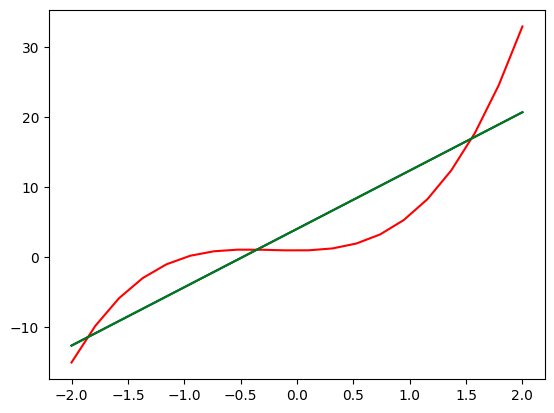

In [109]:
from matplotlib import pyplot as plt
import tests as tests
import util

input = [tests.create_test(func=lambda x: util.polynomial(5)(x)(np.array([1., 0., 2., 3., 0.])),
                           model_name='lin',
                           point=np.array([10000.,  1000.]),
                           params=2,
                           begin=-2,
                           end=2,
                           steps=20
                           )]

iter = 0
test = None
for test in input:
    print("model =", test.model)
    print("start = ", test.init_point)
    print("function = ", test.func)
    
    func, jac = test.model
    task1 = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='SGD')
    task2 = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='ADAM')
    
    betta, info = task1(test.X, test.Y, test.init_point, 1e-8, 0.01, 5, 1000)
    betta2, info2 = task2(test.X, test.Y, betta, 0.1, 0.99, 1e-3, 0.0001, 5, 1000)
    
    X = np.linspace(test.begin, test.end, test.steps)
    Y = func(X)(betta)
    
    util.show(test.X, test.Y, X, Y)
    plt.plot(X, func(X)(betta2), 'g-')
    
    iter += 1

In [110]:
betta

array([8.33414867, 4.08018341])

In [111]:
sum((test.Y - test.model[0](test.X)(betta)) ** 2)

488.8608237187293

In [112]:
sum((test.Y - test.model[0](test.X)(betta2)) ** 2)

488.8721946079465